In [1]:
import numpy as np
import pandas as pd

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)


In [2]:
def generate_synthetic_enrollment(start_year=2012, end_year=2025, initial_students=30):
    years = np.arange(start_year, end_year + 1)
    n = len(years)

    # Indices démographiques synthétiques
    birth_rate_index = np.clip(1.0 + np.linspace(0.05, -0.05, n) + rng.normal(0, 0.03, n), 0.8, 1.2)
    migration_index  = np.clip(1.0 + np.linspace(0.02, -0.02, n) + rng.normal(0, 0.04, n), 0.8, 1.2)
    attractiveness   = np.clip(1.0 + rng.normal(0, 0.03, n), 0.85, 1.15)

    # Chocs "policy" rares
    policy_shock = np.zeros(n)
    shock_years = rng.choice(np.arange(n), size=max(1, n//8), replace=False)
    policy_shock[shock_years] = rng.choice([-0.03, -0.02, 0.02, 0.03], size=len(shock_years))

    # ---- COEFFICIENT annuel r(t) (défini et transparent) ----
    base_rate = -0.010  # -1% structurel
    r = (
        base_rate
        + 0.060 * (birth_rate_index - 1.0)
        + 0.050 * (migration_index - 1.0)
        + 0.040 * (attractiveness - 1.0)
        + policy_shock
        + rng.normal(0, 0.010, n)
    )

    # Effectifs simulés
    students = np.zeros(n, dtype=float)
    students[0] = initial_students

    for i in range(1, n):
        students[i] = students[i-1] * (1 + r[i])
        students[i] = np.clip(students[i], 10, 45)

    students = np.rint(students).astype(int)

    return pd.DataFrame({
        "year": years,
        "students": students,
        "annual_growth_rate_r": r,
        "birth_rate_index": birth_rate_index,
        "migration_index": migration_index,
        "school_attractiveness": attractiveness,
        "policy_shock": policy_shock
    })

df = generate_synthetic_enrollment()
df.head(10)


,year,students,annual_growth_rate_r,birth_rate_index,migration_index,school_attractiveness,policy_shock
0,2012,30,-0.001700,1.059142,1.038700,1.012382,0.0
1,2013,30,-0.008522,1.011108,0.982551,1.012925,0.0
2,2014,30,-0.000386,1.057129,1.028596,1.064249,0.0
3,2015,30,0.000156,1.055140,0.972414,0.987808,0.0
4,2016,29,-0.008595,0.960700,1.042830,0.984633,0.0
5,2017,29,-0.005708,0.972473,1.002618,0.975587,0.0
6,2018,29,-0.008417,1.007681,0.994144,1.018479,0.0
7,2019,29,-0.007993,0.986667,0.971224,1.033869,0.0
8,2020,29,-0.002332,0.987958,1.044286,0.996582,0.0
9,2021,28,-0.028963,0.955178,0.986127,0.974795,0.0


In [3]:
import os

os.makedirs("../data", exist_ok=True)
df.to_csv("../data/synthetic_enrollment.csv", index=False)

print("Saved to: ../data/synthetic_enrollment.csv")

Saved to: ../data/synthetic_enrollment.csv


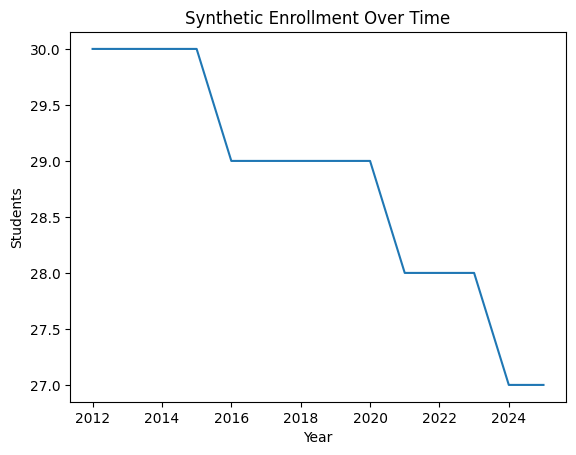

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["year"], df["students"])
plt.title("Synthetic Enrollment Over Time")
plt.xlabel("Year")
plt.ylabel("Students")
plt.show()